# Filtrado en el dominio espacial

En esta practica, se aprenderá sobre los principios de la convolucion una imagen con OpenCV. Se aprenderá a usar OpenCV para aplicar la siguiente función en una imagen:
<ul>
<li>Introduccion a la convolucion</li>
<li>Difuminar imagenes</li>
<li>Aplicacion de distintos filtros espaciales para detección de bordes.</li>
</ul>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (20, 20))
  for i, p in enumerate(images):
    axs[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
    axs[i].set_title(titles[i])
    axs[i].axis('off')
  plt.show()

## Convolucion en 2-D

La operación fundamental y más básica en el procesamiento de imágenes es la <b>convolución</b>. Es un tema importante en la edición de imágenes y la visión por computadora, donde puede utilizarse, entre otras cosas, para eliminar el ruido y resaltar determinadas características.

Esto se puede conseguir utilizando <i>Kernels</i>. El kernel es una matriz cuadrada $M \times N$ donde $M$ y $N$ son generalmente números impares. Para producir un efecto deseado, estos kernels pueden emplearse para realizar operaciones matemáticas en cada píxel de una imagen (como desenfocar o afinar una imagen). Este proceso se le puede llamar <b><i>filtrado</i></b>.

<center><img src="Recursos\Convolucion.gif" width="400" align="center"></center>

El resultado encontrado en la imagen filtrada depende mucho del valor del kernel aplicado a la imagen. Lo importante del proceso de filtrado es el valor, o también llamado <i>peso</i> tiene cada valor de la matriz de convolución.

### Kernel identidad

La acción más simple y fundamental del filtrado se aplica mediante el kernel identidad. La imagen utilizada como entrada y la imagen creada como salida son similares, ya que no se alteran en contenido. La imagen de entrada se altera en tamaño debido a la aplicacion de la convolución. El kernel identidad es una matriz cuadrada, y el elemento uno en el centro. Los demás componentes de la matriz son todos iguales a 0.

$K =
  \left[ {\begin{array}{cc}
    0 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 0\\
  \end{array} } \right]
$

Para crear un kernel tipo matriz, se utiliza <i>numpy</i>.

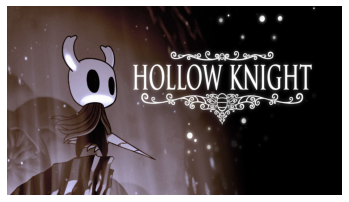

In [3]:
img_hk = cv2.imread('Recursos\Hollow Knight.jpg')

plt.axis('off')
plt.imshow(img_hk)


Para aplicar un kernel para la convolucion en OpenCV, se utiliza la funcion `filter2D()`.

#### Sintaxis de Función

``` python
dst = cv2.filter2D(src, ddepth, kernel)
```

`dst`: Crea una imagen con el mismo tamaño que la fuente y el mismo numero de canales

La función tiene **3 argumento de entrada requeridos**:


1. `src`: Imagen fuente. Es un argumento **obligatorio**.
2. `ddepth`: Profundidad deseada de la imagen de destino. Es un argumento **obligatorio**. (Cuando `ddepth=-1`, la imagen de salida tendra la misma profundidad que la imagen fuente.)
3. `kernel`: Kernel de convolucion a aplicar. Es un argumento **obligatorio**.



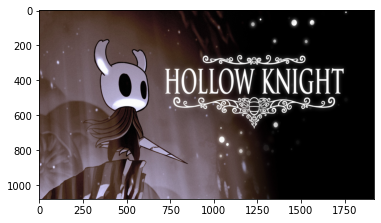

In [4]:
#arreglo identidad creado mediante numpy
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])


identidad = cv2.filter2D(src=img_hk, ddepth=-1, kernel=kernel1)

plt.imshow(identidad)

## Difuminacion de la imagen

Si se examina de cerca una imagen borrosa, un hallazgo típico es que la imagen es suave, lo que indica que los bordes no son visibles.

<center><img src="Demostrativas\FotoDifuminada.jpg"/ width=640 height=360></center>

Para desenfocar una imagen, ejecutamos una operación de convolución entre la imagen de entrada y un núcleo de filtro de paso bajo que ha sido predeterminado. En este contexto, la frecuencia se refiere a los cambios de valor de los píxeles. Como la imagen borrosa es suave en los bordes, la alta frecuencia debe filtrarse. Al limitarse a reducir el contenido de los bordes, el desenfoque crea una transición extremadamente fluida de un tono a otro. Con él se puede eliminar el ruido.

### Tipos de filtros en difuminacion

Podemos utilizar diversos filtros lineales (espaciales) para desenfocar o suavizar las imágenes, ya que son rápidos y sencillos de aplicar. Los filtros lineales más populares son:

<ul>
    <li>Homogéneo</li>
    <li>Gaussiano</li>
    <li>Mediano</li>
</ul>
 
Sin embargo, hay algunos filtros no lineales que pueden emplearse en situaciones en las que deseamos desenfocar la imagen manteniendo sus límites, como un filtro bilateral, un filtro bilateral adaptativo, etc.

### Promedio (filtro medio u homogéneo)

Al promediar, el elemento central se sustituye simplemente por la media de todos los píxeles dentro de la región del núcleo. El filtro de caja, el filtro homogéneo y el filtro de media son otros nombres para el filtro de media. Las siguientes características describen un filtro de media.

<ol>
    <li>Debe ser una orden impar.</li>
    <li>La suma de todos los elementos debe ser 1.</li>
    <li>Todos los elementos deben de ser iguales.</li>
</ol>

El núcleo "K" para el filtro de caja:

$K =
  \frac{1}{K_{ancho}\cdot K_{alto}}\cdot\left[ {\begin{array}{cc}
    1 & 1 & \cdots & 1 \\
    1 & 1 & \cdots & 1\\
    \cdot & \cdot & \cdots & 1 \\
    1 & 1 & \cdots & 1
  \end{array} } \right]
$

#### Aplicando filtro mediano custom en OpenCV

Vamos a mostrar cómo hacer que una imagen sea borrosa. En este caso también, crearemos un núcleo único y aplicaremos la operación de filtrado a la imagen original utilizando la función `filter2D()` de OpenCV. Crea un kernel de $5\times5$ que sólo contenga unos para empezar. Se debe de tener en cuenta también que debemos dividido el kernel por 25.

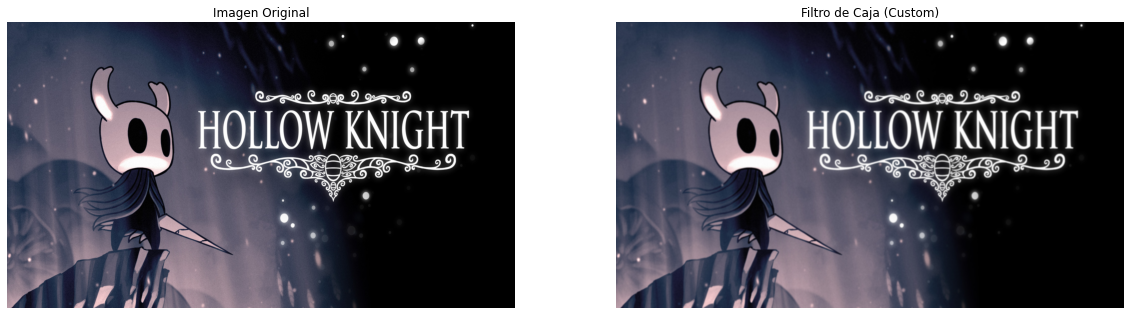

In [5]:
# creacion de un kernel de filtro medio mediante uso de numpy
kernel2 = np.ones((5, 5), np.float32) / 25

img_blur_custom = cv2.filter2D(src=img_hk, ddepth=-1, kernel=kernel2)

imagenes = [img_hk, img_blur_custom]
titulos = ['Imagen Original','Filtro de Caja (Custom)']

plot_img(imagenes, titulos)

### Usando la función incorporada de OpenCV para desenfocar una imagen

Usando la función `blur()` que es parte de OpenCV, también puedes desenfocar una imagen. Utilízala para desenfocar fotos cuando no necesites declarar explícitamente un núcleo; es esencialmente una función de conveniencia.

#### Sintaxis de Función

``` python
dst = cv2.blur(src, ksize)
```

`dst`: Crea una imagen con el mismo tamaño que la fuente y el mismo numero de canales

La función tiene **2 argumento de entrada requeridos**:

1. `src`: Imagen fuente. Es un argumento **obligatorio**.
2. `ksize`: Tamaño del núcleo de desenfoque. Es un argumento **obligatorio**.


El ejemplo siguiente, que utiliza la función `blur()` generará exactamente la misma salida que el ejemplo anterior, que había utilizado la función `filter2d()`.

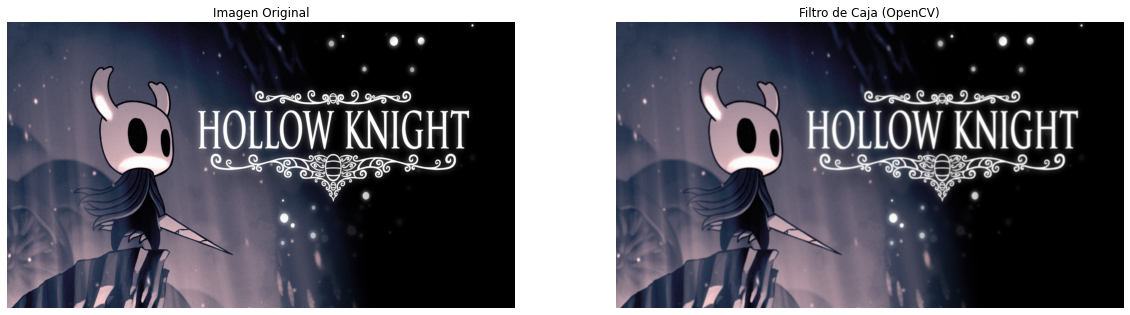

In [6]:
img_blur = cv2.blur(src=img_hk, ksize=(5, 5))

imagenes.pop(1)
titulos.pop(1)
imagenes.append(img_blur)
titulos.append('Filtro de Caja (OpenCV)')

plot_img(imagenes, titulos)

### Filtrado Gaussiano

El filtrado gaussiano (o desenfoque gaussiano) es un método que utiliza núcleos de peso distintos en las direcciones x e y en lugar de un filtro de caja con coeficientes de filtro iguales. En lugar del promedio uniforme indicado en el primer ejemplo, este método emplea un filtro gaussiano que realiza un promedio ponderado. En este caso, el desenfoque gaussiano otorga a los valores de los píxeles un peso que depende de la distancia a la que se encuentran del centro del núcleo. La media ponderada se ve menos afectada por los píxeles que están más lejos del centro.

<center>
    <a href="https://youtu.be/8rrHTtUzyZA?list=PLZHQObOWTQDMp_VZelDYjka8tnXNpXhzJ&t=319">
        <img src="Demostrativas\FiltroGaussianoVisualizacion.jpg" title="Visualizacion de Filtro Gaussiano">
    </a>
</center>

Ahora aplicaremos un desenfoque gaussiano a una imagen, usando la función `GaussianBlur()` de OpenCV.

#### Sintaxis de Función

``` python
dst = cv2.GaussianBlur(src, ksize, sigmaX, sigmaY)
```

`dst`: Crea una imagen con el mismo tamaño que la fuente y el mismo numero de canales

La función tiene **4 argumento de entrada requeridos**:

1. `src`: imagen de entrada; la profundidad debe ser uno de los siguientes valores: <i>CV_8U</i>, <i>CV_16U</i>, <i>CV_16S</i>, <i>CV_32F</i> o <i>CV_64F</i>. La imagen puede tener cualquier número de canales que se procesan individualmente. Es un argumento **obligatorio**.
2. `ksize`: Tamaño del kernel gaussiano. Aunque las tamaños pueden variar en renglones y columnas, ambos deben ser impares y positivos. O bien, pueden ser ceros, en cuyo caso se utilizaría sigma para calcularlos. Es un argumento **obligatorio**.
3. `sigmaX`: Desviación estándar del kernel gaussiano en la dirección X.
4. `sigmaY`: Desviación estandar del kernel gaussiano en la dirección Y.

El siguiente código convoluciona una imagen, utilizando la función `GaussianBlur()` de OpenCV.


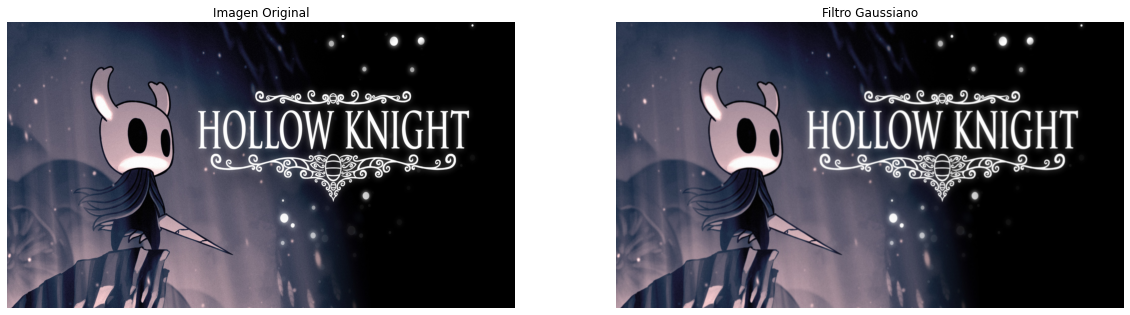

In [7]:
img_gauss = cv2.GaussianBlur(src=img_hk, ksize=(5, 5), sigmaX=0, sigmaY=0)

imagenes.clear()
imagenes = [img_hk, img_gauss]
titulos = ['Imagen Original','Filtro Gaussiano']

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()


### Filtrado de la mediana

El filtrado de la mediana calcula la mediana de todos los píxeles el kernel y sustituye el píxel central por este valor de la mediana. El valor filtrado del elemento central en los filtros de caja y gaussiano puede ser un valor ausente en la imagen original. En cambio, el componente central se sustituye siempre por un valor de píxel de la imagen en el filtrado de la mediana. De este modo se consigue reducir el ruido. Aunque otros filtros pueden ser útiles ocasionalmente, esta técnica es bastante buena para eliminar el ruido de sal y pimienta.

Observemos como reducir el ruido de sal y pimienta en la siguiente imagen.

<center><img src="Recursos\Salt_n_Pepper Hollow Knight.jpg" width=640></center>

Se puede aplicar un filtro de la mediana mediante el comando de OpenCV de `medianBlur()`.

#### Sintaxis de Función

``` python
dst = cv2.medianBlur(src, ksize)
```

`dst`: Crea una imagen con el mismo tamaño y tipo que la fuente.

La función tiene **2 argumento de entrada requeridos**:

1. `src`: imagen de entrada; la profundidad debe ser uno de los siguientes valores: <i>CV_8U</i>, <i>CV_16U</i> o <i>CV_32F</i>. La imagen puede tener cualquier número de canales que se procesan individualmente. Es un argumento **obligatorio**.
2. `ksize`: Tamaño de apertura lineal; debe ser entero impar y mayor que 1, por ejemplo: 3, 5, 7... Es un argumento **obligatorio**.


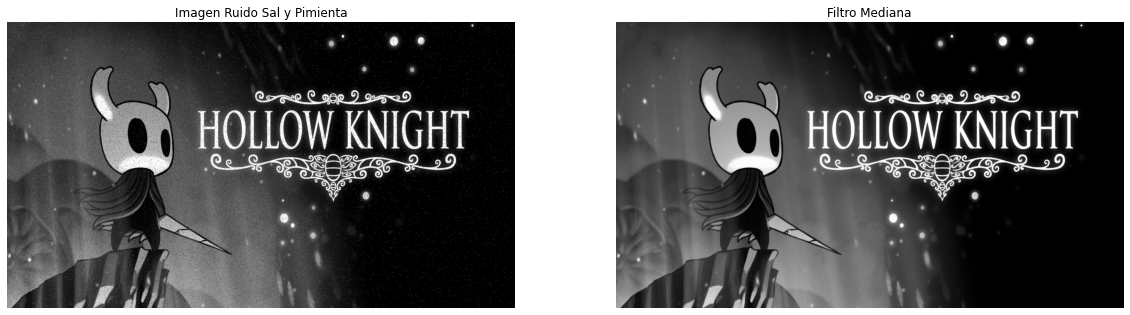

In [8]:
img_salpim = cv2.imread('Recursos\Salt_n_Pepper Hollow Knight.jpg', cv2.IMREAD_GRAYSCALE)

img_mediana = cv2.medianBlur(src=img_salpim, ksize=5)

imagenes = [img_salpim, img_mediana]
titulos = ['Imagen Ruido Sal y Pimienta', 'Filtro Mediana']

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

## Detección de Bordes

En una imagen digital, los bordes son grandes cambios localizados de intensidad. Se denomina borde a un grupo de píxeles enlazados que forman una frontera entre dos regiones desconectadas.Los límites o bordes de la imagen son aquellas zonas en las que el brillo de la imagen fluctúa drásticamente. La detección de bordes es un método de procesamiento de imágenes que se utiliza para localizar áreas en una imagen digital con cambios bruscos de brillo o, dicho de otro modo, discontinuidades.

<center><img src='Demostrativas\Deteccion de Bordes.png' alt="Aplicacion de deteccion de bordes"></center>

<figcaption>Fuente <a href='https://en.wikipedia.org/wiki/Edge_detection'>Wikipedia</a></figcaption>

Es una etapa fundamental en el procesamiento de imágenes, la visión por ordenador y el reconocimiento de patrones de imágenes. Los algoritmos de convolución nos ayudan al procesar imágenes digitales de muy alta resolución y a aplicar la deteccion de bordes.

La imagen en color se debe de convertir a una imagen en escala de grises porque no necesita información de color para detectar los bordes.

### Tipos de Filtros de Detección de Bordes

A continuación se presentan algunos de los métodos más populares de los muchos que existen.

<ul>
    <li>Sobel</li>
    <li>Prewitt</li>
    <li>Roberts</li>
    <li>Canny</li>
</ul>

### Operador Sobel

Es un operador de diferenciación discreta. Para la detección de los bordes de la imagen, calcula la aproximación del gradiente de la función de intensidad de la imagen. El operador Sobel genera la normal del vector o el vector de gradiente correspondiente para cada píxel de una imagen. Las aproximaciones de la derivada vertical y horizontal se calculan utilizando dos núcleos o máscaras de 3 x 3 que se conviven con la imagen de entrada, respectivamente.

$M_x =
  \left[ {\begin{array}{cc}
    -1 & 0 & 1\\
    -2 & 0 & 2\\
    -1 & 0 & 1\\
  \end{array} } \right]
$
$M_y =
  \left[ {\begin{array}{cc}
    -1 & -2 & 1\\
    0 & 0 & 0\\
    1 & 2 & 1\\
  \end{array} } \right]
$

Es uno de los detectores de bordes más utilizados y ayuda a reducir el ruido y proporciona una respuesta diferenciadora y de bordes simultáneamente. Para su aplicación en OpenCV, se utiliza el comando `Sobel()`.

#### Sintaxis de Función

``` python
dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
```

`dst`: Crea una imagen con el mismo tamaño y tipo que la fuente.

La función tiene **4 argumento de entrada requeridos**:

1. `src`: Imagen de entrada. Es un argumento **obligatorio**.
2. `ddepth`: Especifica la precisión de la imagen de salida. Cuando `ddepth = -1`, la imagen de salida tendrá la misma profundidad que la fuente. Es un argumento **obligatorio**.
3. `dx`: Orden de la derivada en x. Es un argumento **obligatorio**.
4. `dy`: Orden de la derivada en y. Es un argumento **obligatorio**.
5. `ksize`: Tamaño del núcleo de Sobel ampliado

En el siguiente ejemplo de código, se utiliza la función `Sobel()`:

In [9]:
img_bw_hk = cv2.cvtColor(img_hk, cv2.COLOR_BGR2GRAY)

img_sobel = cv2.Sobel(src= img_bw_hk, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

# cv2.imwrite('Demostrativas/Hollow Knight Sobel.jpg', img_sobel)

El resultado obtenido es el siguiente.

<center><img src="Demostrativas\Hollow Knight Sobel.jpg" width=520></center>

### Operador Prewitt

Este operador es casi idéntico al operador sobel. La diferencia entre las respectivas intensidades de los píxeles de una imagen se utiliza para calcular los bordes. Además, puede identificar los bordes horizontales y verticales de una imagen. Es uno de los mejores métodos para determinar la orientación y el tamaño de una imagen. Se utilizan los kernels o máscaras:

$M_x =
  \left[ {\begin{array}{cc}
    -1 & 0 & 1\\
    -1 & 0 & 1\\
    -1 & 0 & 1\\
  \end{array} } \right]
$
$M_y =
  \left[ {\begin{array}{cc}
    -1 & -1 & -1\\
    0 & 0 & 0\\
    1 & 1 & 1\\
  \end{array} } \right]
$

El mejor operador para detectar la orientación de una imagen. Se obtienen dos imagenes de sus respectivas derivadas de dirección, las cuales tienen que ser sumadas. Su aplicación en OpenCV se realiza mediante un kernel en `numpy` y la funcion `filter2D()`.

Sin embargo, se requiere la funcion adicional `convertScaleAbs()`. Esta función escala, calcula los valores absolutos y, a continuación, reconvierte la salida en 8 bits.

#### Sintaxis de Función

``` python
dst = cv2.convertScaleAbs(src)
```

`dst`: Arreglo de salida.

La función tiene **1 argumento de entrada requeridos**:

1. `src`: Imagen de entrada. Es un argumento **obligatorio**.

In [13]:
# Operadores de Prewitt
prew_kernel_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])

prew_kernel_y = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])

# Aplicar filtros
der_x = cv2.filter2D(img_bw_hk, cv2.CV_64F, prew_kernel_x)
der_y = cv2.filter2D(img_bw_hk, cv2.CV_64F, prew_kernel_y)

# Fusionar images, convirtiendo a uint8
absX = cv2.convertScaleAbs(der_x)
absY = cv2.convertScaleAbs(der_y)

img_prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# cv2.imwrite('Demostrativas/Hollow Knight Prewitt.jpg', img_prewitt)


True

El resultado obtenido es el siguiente.

<center><img src="Demostrativas\Hollow Knight Prewitt.jpg" width=520></center>

### Operador Roberts

El operador de Roberts, uno de los más sencillos, utiliza operadores de diferencia local para encontrar bordes. Para detectar los bordes, aproxima la amplitud del gradiente utilizando la diferencia entre dos píxeles consecutivos en la dirección diagonal. Es más eficaz para detectar los bordes verticales que los oblicuos, tiene una excelente precisión de posicionamiento, es sensible al ruido y no puede atenuar el impacto del ruido. Se utilizan los kernels o máscaras:

$M_x =
  \left[ {\begin{array}{cc}
    1 & 0 \\
    0 & -1 
  \end{array} } \right]
$
$M_x =
  \left[ {\begin{array}{cc}
    0 & 1 \\
    -1 & 0 
  \end{array} } \right]
$

Se utiliza el mismo proceso para aplicar el operador en OpenCV que para el filtro Prewitt.

In [11]:
# Operadores de Roberts
rob_kernel_x = np.array([[1, 0],
                          [0, -1]])

rob_kernel_y = np.array([[0, 1],
                          [-1, 0]])

# Aplicar filtros
der_x = cv2.filter2D(img_bw_hk, cv2.CV_64F, rob_kernel_x)
der_y = cv2.filter2D(img_bw_hk, cv2.CV_64F, rob_kernel_y)

# Fusionar images, convirtiendo a uint8
absX = cv2.convertScaleAbs(der_x)
absY = cv2.convertScaleAbs(der_y)

img_roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

cv2.imwrite('Demostrativas/Hollow Knight Roberts.jpg', img_roberts)

True

El resultado obtenido es el siguiente.

<center><img src="Demostrativas\Hollow Knight Roberts.jpg" width=520></center>

### Operador Canny

Al ser tan fiable y adaptable, la detección de bordes Canny es una de las técnicas de detección de bordes más utilizadas en la actualidad. Utiliza un operador basado en gaussianas para la detección de bordes. El ruido no afecta a este operador. Sin modificar ni cambiar la característica, extrae las características de la imagen. La técnica avanzada utilizada por el detector de bordes Canny se derivó de trabajos anteriores sobre el laplaciano del operador gaussiano. Con frecuencia se emplea un método eficaz de detección de bordes. Para que el algoritmo extraiga los bordes de una imagen, hay que seguir tres pasos. A ello hay que añadir el paso de preprocesamiento de desenfoque de la imagen, necesario para reducir el ruido. Por lo tanto, ahora tiene cuatro etapas, que son las siguientes:

<ul>
<li>Supresión del ruido</li>
<li>Cálculo del gradiente de intensidad de la imagen</li>
<li>Supresión de bordes falsos</li>
<li>Umbralizado de Histéresis</li>
</ul>

La siguiente es la sintaxis para aplicar la detección de bordes Canny usando OpenCV:

#### Sintaxis de Función

``` python
edges = cv2.Canny(image, threshold1, threshold2)
```

`edges`: Mapa de bordes de la imagen de entreda. Es una imagen de 8 bits monocanal, de mismo tamaño que la imagen original.

La función tiene **3 argumento de entrada requeridos**:

1. `image`: Imagen de entrada de 8 bits. Es un argumento **obligatorio**.
2. `threshold1`: Valor de umbralizado para el primer proceso de histéresis. Es un argumento **obligatorio**.
3. `threshold2`: Valor de umbralizado para el segundo proceso de histéresis. Es un argumento **obligatorio**.

En el siguiente ejemplo de código, se utiliza la función `Canny()`:


In [12]:
edges = cv2.Canny(image=img_bw_hk, threshold1=100, threshold2=200)

El resultado obtenido es el siguiente.

<center><img src="Demostrativas\Hollow Knight Canny.jpg" width=520></center>

## Ejercicios
<br>
1. Diseñe un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Obtenga la captura de video de una cámara web conectada a la computadora (interna o externa).</li>
    <li>La captura de video debe de ser mostrado en la ventana creada con el nombre "<i>Ejercicio 5.1</i>" hasta que se presione la tecla <i><code>q</code></i>.</li>
    <li>Aplicar el filtro suavizante de caja sobre el video al presionar la tecla <i><code>b</code></i>.</li>
    <li>Aplicar el filtro suavizante Gaussiano sobre el video al presionar la tecla <i><code>g</code></i>.</li>
    <li>Aplicar el filtro suavizante medio sobre el video al presionar la tecla <i><code>m</code></i>.</li>
    <li>Al presionar la tecla <i><code>n</code></i>, regresar a la captura de video sin filtros.</li>
    </ul>
<br>
2. Diseñe un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Obtenga la captura de video de una cámara web conectada a la computadora (interna o externa).</li>
    <li>La captura de video debe de ser mostrado en la ventana creada con el nombre "<i>Ejercicio 5.2</i>" hasta que se presione la tecla <i><code>q</code></i>.</li>
    <li>Aplicar el filtro de detección de bordes Sobel el video al presionar la tecla <i><code>s</code></i>.</li>
    <li>Aplicar el filtro de detección de bordes Prewitt sobre el video al presionar la tecla <i><code>p</code></i>.</li>
    <li>Aplicar el de detección de bordes Roberts sobre el video al presionar la tecla <i><code>r</code></i>.</li>
    <li>Aplicar el de detección de bordes Canny sobre el video al presionar la tecla <i><code>c</code></i>.</li>
    <li>Al presionar la tecla <i><code>n</code></i>, regresar a la captura de video sin filtros.</li>
    </ul>
<br>
3. Modifique los valores de tamaño de kernel de convolución y parametros de entrada. Observe y describa las diferencias.